# Bitcoinと日本円

In [1]:
import pandas as pd
import numpy as np
import talib as ta
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# matplotlibのwarningを無視する
warnings.simplefilter("ignore")

In [2]:
start = "2019-07-01"
end = "2023-03-01"
df = yf.download('BTC-JPY', start, end)
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-01,1170192.875,1213080.750,1094052.000,1146814.875,1146814.875,3183537385670
2019-07-02,1147416.250,1180458.750,1053347.000,1164542.750,1164542.750,3343863295480
2019-07-03,1166424.375,1289941.625,1166424.375,1289221.500,1289221.500,3319338544470
2019-07-04,1290455.500,1294055.875,1204040.875,1209220.000,1209220.000,2794660280160
2019-07-05,1207848.500,1237739.750,1173814.750,1190778.625,1190778.625,2585640755980


### 分析指標の作成

In [4]:
date = df.index
close = df["Adj Close"]

span01=5
span02=25
span03=50

# 移動平均
df["sma01"] = close.rolling(window=span01).mean()
df["sma02"] = close.rolling(window=span02).mean()
df["sma03"] = close.rolling(window=span03).mean()
# MACD
df["macd"], df["macdsignal"], df["macdhist"] = ta.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
# RSI
df["RSI"] = ta.RSI(close, timeperiod=25)
# ボリンジャーバンド
df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

### データの描画

Text(0.5, 0.98, 'BTC-JPY')

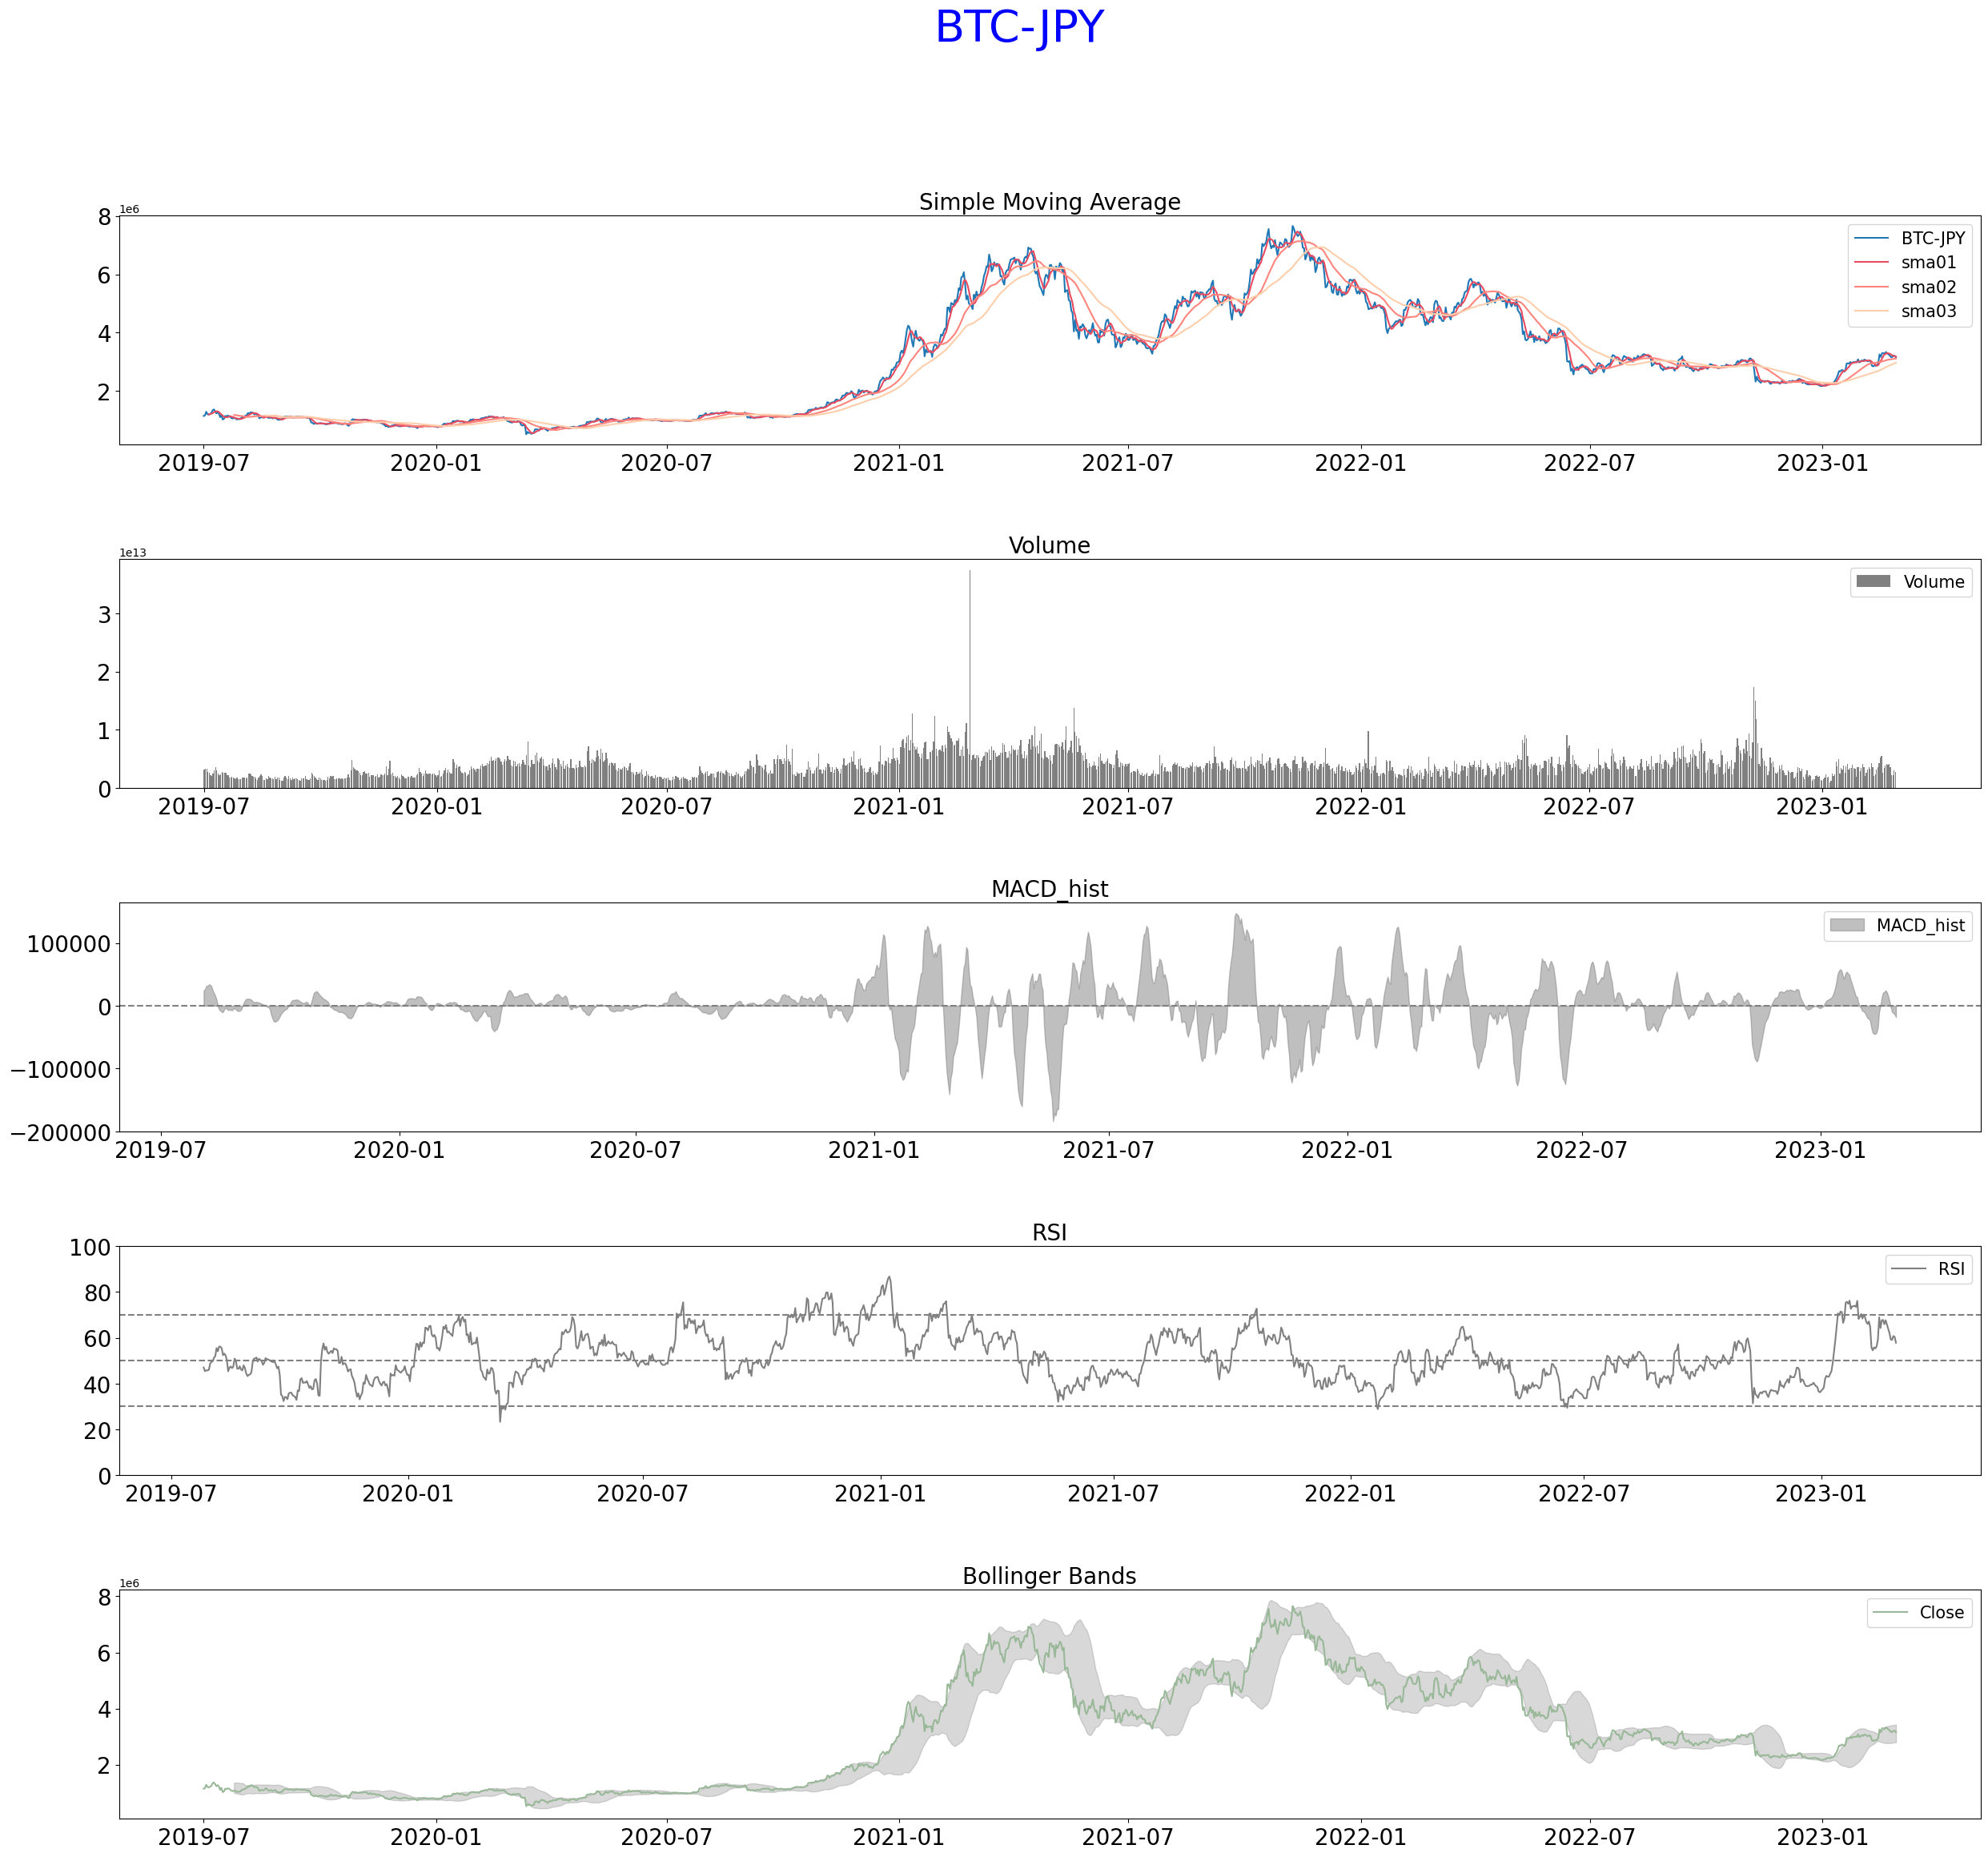

In [6]:
fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(5, 1, figsize=(30, 26))
fig.subplots_adjust(hspace=0.5) # 垂直方向のスペースを 0.5 に指定

# 移動平均-----------------------------------------------------------
ax1.plot(date, close, label="BTC-JPY")
# それぞれのSMAの描画
ax1.plot(date, df["sma01"], label="sma01", color="#e84a5f")
ax1.plot(date, df["sma02"], label="sma02", color="#ff847c")
ax1.plot(date, df["sma03"], label="sma03", color="#feceab")
ax1.set_title("Simple Moving Average", fontsize=20)
ax1.tick_params(axis="both", which="major", labelsize=20)
ax1.legend(fontsize=15)

# 出来高-----------------------------------------------------------
ax2.bar(date, df["Volume"], label="Volume", color="gray")
# tickのサイズを変更する
ax2.set_title("Volume", fontsize=20)
ax2.tick_params(axis="both", which="major", labelsize=20)
ax2.legend(fontsize=15)


# MACD-----------------------------------------------------------
ax3.fill_between(date, df["macdhist"], alpha=0.5, label="MACD_hist", color="gray")
# y=0 に水平線を引く
# ax2.hlines(0, start, end, colors="gray", linestyles="dashed")
ax3.axhline(y=0, color="gray", linestyle="dashed")
ax3.set_title("MACD_hist", fontsize=20)
ax3.tick_params(axis="both", which="major", labelsize=20)
ax3.legend(fontsize=15)


# RSI-----------------------------------------------------------
ax4.plot(date, df["RSI"], label="RSI", color="gray")
ax4.set_ylim(0, 100)
# Oversoldの指標
ax4.axhline(y=30, color="gray", linestyle="dashed")
# 真ん中の水平線
ax4.axhline(y=50, color="gray", linestyle="dashed")
# Overboughtの指標
ax4.axhline(y=70, color="gray", linestyle="dashed")

ax4.set_title("RSI", fontsize=20)
ax4.tick_params(axis="both", which="major", labelsize=20)
ax4.legend(fontsize=15)


# ボリンジャーバンド-----------------------------------------------------------
ax5.plot(date, close, label="Close", color="#99b898")
ax5.fill_between(date, df["upper"], df["lower"], color="gray", alpha=0.3)
ax5.set_title("Bollinger Bands", fontsize=20)
ax5.tick_params(axis="both", which="major", labelsize=20)
ax5.legend(fontsize=15)

# 全体のタイトルの指定
fig.suptitle('BTC-JPY', fontsize=40, color="blue")